In [7]:
%matplotlib inline
import os, sys
import numpy as np
import pandas as pd
import pickle
from matplotlib import pyplot as plt

with open('weights.dump', 'rb') as f:
    (W_conv, W_out) = pickle.load(f)

test = list()
for i in range(10):
    test.append(np.array(pd.read_csv('Part3_%d_Test.csv'%i, header=None).head(1)).reshape(28,28))

In [2]:
def conv7(w):
    """ 7x7 convolution in matrix form """
    def forward(x):
        convmat = np.block([
            #                 vvv throw away final padding & bias
            [np.zeros(jj), w[:-22], np.zeros(21-jj)] for jj in range(22)
        ])
        rows = np.array([np.dot(convmat, x[ii*28:ii*28+7*28]) for ii in range(22)])
        return np.tanh(rows.ravel() + w[-1])
    return forward

def softmax(x):
    a = np.exp(x)
    return a / np.sum(a)

conv_filters = [conv7(w) for w in W_conv]
conv_layer = lambda x: np.array([f(x) for f in conv_filters])


In [ ]:
y = conv_layer(test[3].ravel())
for rf in y:
    fig = plt.figure(figsize=(2,2))
    plt.imshow(rf.reshape(22,22).T)
#     plt.close(fig)

In [47]:
import itertools
CONV7_OFFSETS = list(itertools.chain(*[range(ii*28,ii*28+22) for ii in range(22)]))

def transposed_convmat(w):
    return np.block([
        [np.zeros(jj), w[:-(21+1)], np.zeros(28*28-(7*28-21)-jj)]
            for jj in CONV7_OFFSETS
    ]).T

def tconv7(w):
    ww = transposed_convmat(w)
    return lambda x: np.dot(ww, x)
        
tconv_filters = [tconv7(w) for w in W_conv]
tconv_layer = lambda x: np.array([f(xk) for f,xk in zip(tconv_filters, x)])

model = lambda x: tconv_layer(conv_layer(x)).reshape(-1, 28, 28)
# transposed_conv = np.dot(
#     transposed_convmat(W_conv[0]),
#     conv_layer(test[3].ravel())[0])



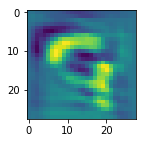

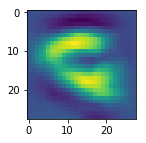

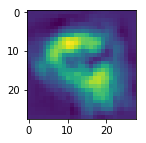

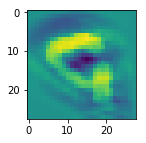

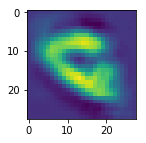

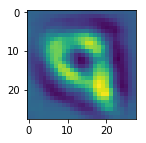

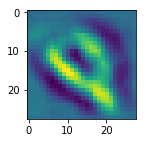

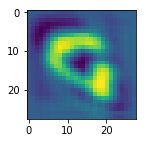

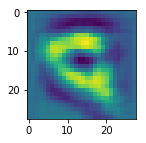

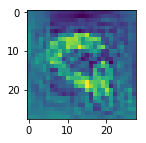

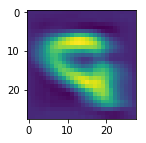

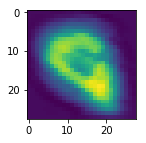

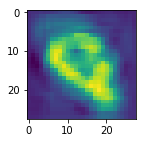

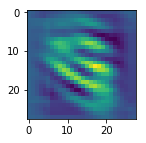

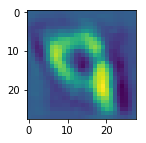

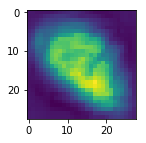

In [58]:
yy = model(test[9].ravel())
for tc in yy:
    fig = plt.figure(figsize=(2,2))
    plt.imshow(tc.T)

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(transposed_convmat(W_conv[0]))

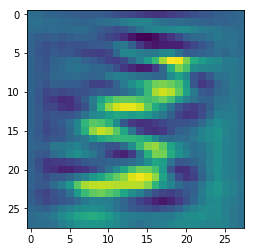

In [39]:
plt.imshow(transposed_conv.reshape(28,28).T)